### Clonando o repositório
`Rode apenas se não tiver o rep clonado`

In [1]:
!git clone --branch branch-little-pedro https://github.com/ICEI-PUC-Minas-PPL-CDIA/projeto-5-redes-profundas-projeto-v-produtos-industriais.git

Cloning into 'projeto-5-redes-profundas-projeto-v-produtos-industriais'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 215 (delta 66), reused 140 (delta 31), pack-reused 0 (from 0)
Receiving objects: 100% (215/215), 8.83 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [2]:
%cd /content/projeto-5-redes-profundas-projeto-v-produtos-industriais


/content/projeto-5-redes-profundas-projeto-v-produtos-industriais


### Sempre faça o pull

In [7]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 2), reused 5 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (5/5), 526 bytes | 526.00 KiB/s, done.
From https://github.com/ICEI-PUC-Minas-PPL-CDIA/projeto-5-redes-profundas-projeto-v-produtos-industriais
   37353b7..2e1c5da  branch-little-pedro -> origin/branch-little-pedro
Updating 37353b7..2e1c5da
Fast-forward
 src/utils/__init__.py | 6 +++---
 1 file changed, 3 insertions(+), 3 deletions(-)


In [10]:
from utils.dataset import CableDataset #Classe dataset criada
from utils.load_data import load_image_paths_and_labels # função para pegar os caminhos das imagens
from utils.balance_data import undersample_dataset# função para balancear os dados


import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [11]:
# transformações nada aver só pro teste
test_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(),  # Normalização padrão
    ToTensorV2(),   # Converte para tensor PyTorch
])

In [13]:
root_dir = '/content/drive/MyDrive/Projeto-V/data/cable/test'
image_paths, labels, class_to_idx = load_image_paths_and_labels(root_dir)

print("Classes encontradas:", class_to_idx)
print("Total de imagens:", len(image_paths))


Classes encontradas: {'bent_wire': 0, 'cable_swap': 1, 'combined': 2, 'cut_inner_insulation': 3, 'cut_outer_insulation': 4, 'good': 5, 'missing_cable': 6, 'missing_wire': 7, 'poke_insulation': 8}
Total de imagens: 150


In [14]:
balanced_image_paths, balanced_labels = undersample_dataset(image_paths, labels)

print("Total de imagens após balanceamento:", len(balanced_image_paths))

Total de imagens após balanceamento: 90


In [15]:
dataset = CableDataset(balanced_image_paths, balanced_labels, transform=test_transform)

In [17]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

In [18]:
for imgs, lbls in dataloader:
    print(f"Batch de imagens: {imgs.shape}")
    print(f"Batch de labels: {lbls}")
    break

Batch de imagens: torch.Size([4, 3, 224, 224])
Batch de labels: tensor([1, 8, 6, 0])


In [19]:
import matplotlib.pyplot as plt

def show_batch(imgs, labels):
    """
    Exibe um batch de imagens com seus respectivos rótulos.

    Parâmetros:
    - imgs: Tensor de imagens com shape [batch_size, C, H, W]
    - labels: Tensor de rótulos com shape [batch_size]

    O PyTorch trabalha com imagens no formato [C, H, W],
    mas o matplotlib espera [H, W, C].
    Por isso, fazemos o permute.
    """

    grid_size = len(imgs)  # Número de imagens no batch
    fig, axs = plt.subplots(1, grid_size, figsize=(15, 5))  # Cria uma linha com vários gráficos

    for i in range(grid_size):
        # 1. Seleciona a imagem i-ésima
        img = imgs[i]

        # 2. Reorganiza as dimensões: [C, H, W] → [H, W, C]
        img = img.permute(1, 2, 0)

        # 3. Converte o tensor para numpy array (matplotlib só trabalha com numpy)
        img = img.cpu().numpy()

        # 4. Ajusta o range dos valores para [0, 1] para visualização correta
        img = (img - img.min()) / (img.max() - img.min() + 1e-5)

        # 5. Mostra a imagem no subplot
        axs[i].imshow(img)

        # 6. Coloca o título com o rótulo correspondente
        axs[i].set_title(f"Label: {labels[i].item()}")

        # 7. Remove as marcas dos eixos para deixar a visualização limpa
        axs[i].axis('off')

    plt.show()


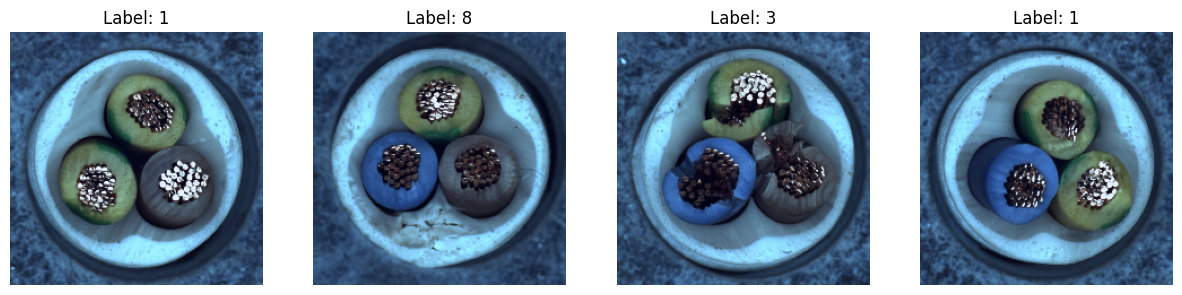

In [20]:
for imgs, lbls in dataloader:
    show_batch(imgs, lbls)
    break  # Exibe apenas o primeiro batch


In [21]:
!git checkout

Your branch is up to date with 'origin/branch-little-pedro'.
